In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [4]:
from keras.preprocessing.image import load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Conv2D,Flatten,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop


2024-02-16 13:25:35.111268: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 13:25:35.111398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 13:25:35.316421: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
picture_size =96
folder_path ="/kaggle/input/face-expression-recognition-dataset/images/"

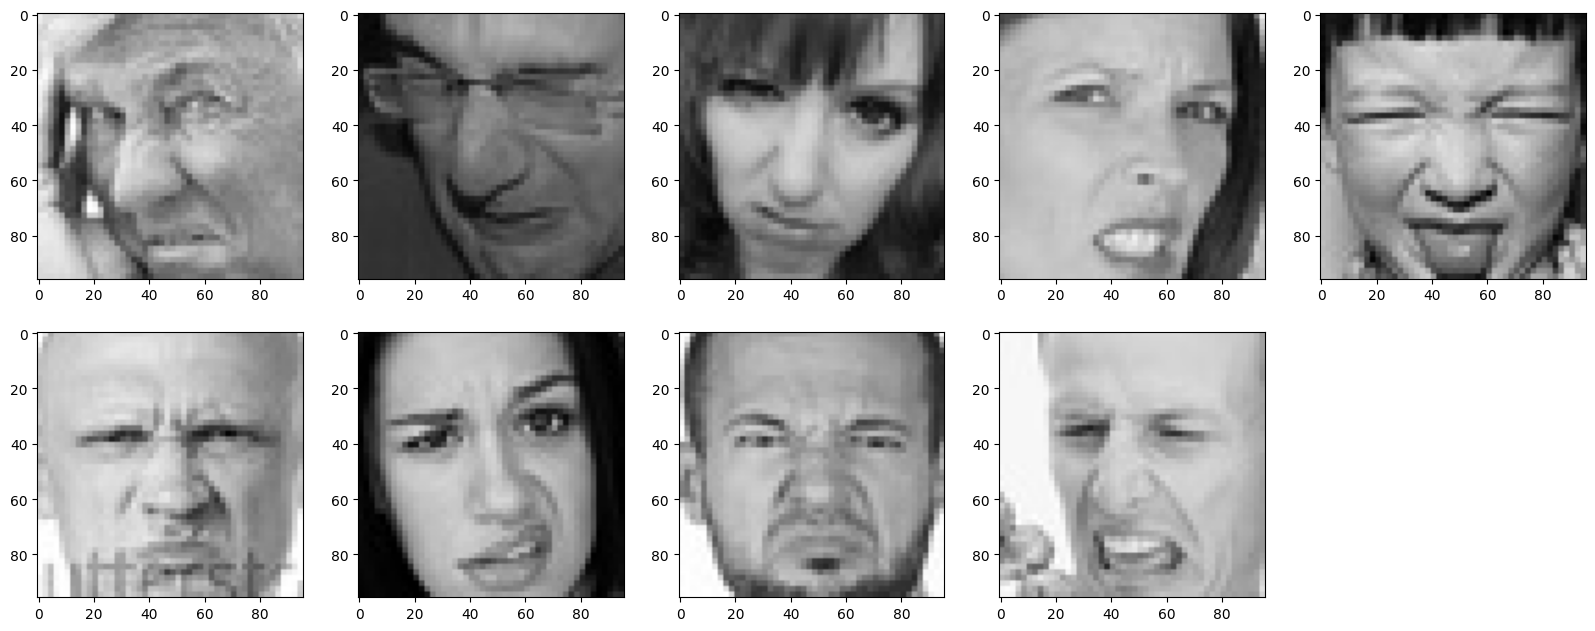

In [6]:
expression='disgust'
plt.figure(figsize=(20,20))
for i in range(1,10,1):
    plt.subplot(5,5,i)
    img=load_img(folder_path +"train/"+expression+"/"+ os.listdir(folder_path+"train/"+expression)[i]
                ,target_size=(picture_size,picture_size))
    plt.imshow(img)
plt.show()

In [13]:
batch_size=130
datagen_train = ImageDataGenerator()
datagen_vald = ImageDataGenerator()
train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size=(picture_size,picture_size),
                                              batch_size= batch_size,
                                              color_mode='grayscale',
                                              class_mode='categorical',
                                              shuffle=True
                                             )

test_set = datagen_vald.flow_from_directory(folder_path+"validation",
                                              target_size=(picture_size,picture_size),
                                              batch_size= batch_size,
                                              color_mode='grayscale',
                                              class_mode='categorical',
                                              shuffle=True
                                             )

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [14]:
no_of_classes =7
model = Sequential() 
#1st CNN LAyer
model.add(Conv2D(64,(3,3),padding='same',input_shape=(96,96,1))) 
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25))

#2nd CNN LAyer 
model.add(Conv2D(128,(5,5),padding='same')) 
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN LAyer
model.add(Conv2D(256,(3,3),padding='same')) 
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN LAyer 
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer 
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.25))

#Fully connected 2nd layer 
model.add(Dense(512)) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation='softmax'))
optimizer = Adam(lr=0.01) 
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy']) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 96, 96, 64)        640       
                                                                 
 batch_normalization_18 (Ba  (None, 96, 96, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_18 (Activation)  (None, 96, 96, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 48, 48, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 48, 48, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 48, 48, 128)      

In [15]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
checkpoint = ModelCheckpoint("./model.h5",monitor='val_acc',verbose=1,save_best_only=True,mode=max)
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               verbose=1,
                               patience=3,
                               restore_best_weights=True
                              )

reduce_lr_Rate=ReduceLROnPlateau(
                   monitor='val_loss',
                   factor=0.2,
                   patience=3,
                   verbose=1,
                   min_delta=0.001
    )

callbacks_list=[early_stopping,checkpoint,reduce_lr_Rate]
epochs=10

In [ ]:
history= model.fit_generator(generator=train_set,
                            steps_per_epoch=train_set.n//train_set.batch_size,
                             verbose=1,
                             epochs=epochs,
                             callbacks=callbacks_list,
                             validation_data=test_set,
                             validation_steps=test_set.n//test_set.batch_size
                            )



/tmp/ipykernel_33/4192080655.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(generator=train_set,


Epoch 1/10
221/221 [==============================] - 2019s 9s/step - loss: 1.7315 - accuracy: 0.3393 - val_loss: 1.6637 - val_accuracy: 0.3942 - lr: 0.0010
Epoch 2/10
147/221 [==================>...........] - ETA: 10:26 - loss: 1.4096 - accuracy: 0.4570